In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',100)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 

## Read Dataset

In [2]:
Train_set = pd.read_csv("Train_Set.csv")
Test_set = pd.read_csv("Test_Set.csv")

In [3]:
Train_set.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,2477882,12386,Consumer,AR,19120,150.0,Central,4383.39,Cat-2,UPI,4,Apparel,0.08,0.10,3,352.78,Fragile,17,191.0,1592.0,0,Standard,4,NORTH,5.0,2.0,0,0
1,2477895,2630,Consumer,BR,2907,165.0,East,4295.72,Cat-2,UPI,4,Apparel,0.47,0.16,3,2018.10,Fragile,17,79.0,1420.0,0,Standard,6,NORTH,2.0,2.0,1,0
2,2473260,1752,Corporate,RJ,90214,171.0,South,3616.65,Cat-50,Cash,7,Fan Shop,0.26,0.07,4,939.63,Not Fragile,46,67.0,1231.0,0,Standard,6,SOUTH,4.0,2.0,0,1
3,2466916,9268,Consumer,UP,745,132.0,East,9175.86,Cat-12,Credit,4,Apparel,0.48,0.18,1,4401.74,Not Fragile,18,45.0,NaN,1,2A,4,NORTH,4.0,3.0,1,1
4,2351480,2888,Corporate,UP,92427,NaN,North,2779.29,Cat-3,UPI,5,Golf,0.13,0.16,4,361.70,Not Fragile,29,43.0,1018.0,1,Standard,5,CENTRAL,2.0,1.0,0,1


In [4]:
Test_set.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,2372881,2989,others,HR,735,NaN,West,2833.08,Cat-3,UPI,5,Golf,-0.68,0.07,5,-1920.91,Fragile,29,25.0,1720.0,0,Standard,6,NORTH,5.0,2.0,1
1,2445349,5359,Consumer,MA,737,222.0,Central,14133.42,Cat-49,Debit,7,Fan Shop,0.08,0.06,1,1132.14,Fragile,48,29.0,964.0,1,Standard,4,CENTRAL,3.0,3.0,0
2,2441537,4111,Corporate,GJ,91350,149.0,East,3545.31,Cat-50,Credit,7,Fan Shop,0.34,0.06,3,1204.39,Fragile,46,121.0,2994.0,0,Standard,6,WEST,3.0,1.0,1
3,2461867,5377,Consumer,RJ,77860,162.0,North,9234.05,Cat-12,UPI,4,Apparel,0.39,0.03,1,3600.48,Not Fragile,18,156.0,1008.0,0,Standard,5,CENTRAL,3.0,3.0,1
4,2461659,10563,Consumer,WB,47922,115.0,North,9174.76,Cat-12,UPI,4,Apparel,0.50,0.06,1,4586.33,Fragile,18,114.0,1354.0,0,Standard,2,NE,3.0,2.0,1


In [5]:
Train_set.shape

(126363, 28)

### Check the Data Type

In [6]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderId             126363 non-null  int64  
 1   Customer_Id         126363 non-null  int64  
 2   Customer_Category   126363 non-null  object 
 3   Cust_State          126363 non-null  object 
 4   Zipcode             126363 non-null  int64  
 5   Sales               122749 non-null  float64
 6   Order_zone          126363 non-null  object 
 7   Price               126363 non-null  float64
 8   CategoryName        126363 non-null  object 
 9   Transcation         126363 non-null  object 
 10  Dept_Id             126363 non-null  int64  
 11  Dept_Name           126363 non-null  object 
 12  Profit_Ratio        126363 non-null  float64
 13  Discount            121313 non-null  float64
 14  Quantity            126363 non-null  int64  
 15  Order_Profit        126363 non-nul

### Checking Missing Values

In [7]:
Total = Train_set.isnull().sum()
Percentage = (Train_set.isnull().sum()/Train_set.shape[0])*100

Missing_values = pd.DataFrame({'Total' : Total, "Percentage": Percentage}).sort_values(by = 'Total', ascending=False)
Missing_values.head(8)

,Total,Percentage
Delivery_Review,9065,7.173777
Discount,5050,3.996423
Session_Ordered,4792,3.792249
Sales,3614,2.860014
ProductLength,2946,2.331379
ProductWeight,695,0.550003
OrderId,0,0.000000
Order_Profit,0,0.000000


In [8]:
Total = Test_set.isnull().sum()
Percentage = (Test_set.isnull().sum()/Test_set.shape[0])*100

Missing_values = pd.DataFrame({'Total' : Total, "Percentage": Percentage}).sort_values(by = 'Total', ascending=False)
Missing_values.head(8)

,Total,Percentage
Delivery_Review,3896,7.194032
Discount,2174,4.014329
Session_Ordered,2031,3.750277
Sales,1460,2.695916
ProductLength,1304,2.407859
ProductWeight,307,0.566881
Quantity,0,0.000000
Warehouse_Region,0,0.000000


### CountPlot of Target Variable

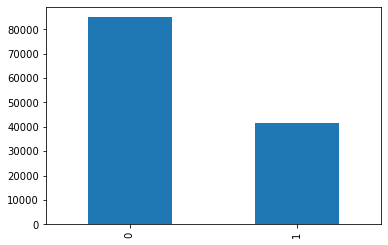

In [40]:
Train_set["Delivery_Status"].value_counts().plot(kind='bar')
plt.show()

### Missing Values Treatment

In [9]:
print(Train_set["Delivery_Review"].value_counts())
print(Train_set["Delivery_Review"].mode())

4.0    42860
3.0    41201
2.0    19732
5.0    11640
1.0     1865
Name: Delivery_Review, dtype: int64
0    4.0
dtype: float64


In [10]:
print(Train_set["Session_Ordered"].value_counts())
print(Train_set["Session_Ordered"].mode())

2.0    40873
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64
0    2.0
dtype: float64


In [11]:
Train_set["Delivery_Review"] = Train_set["Delivery_Review"].fillna(Train_set["Delivery_Review"].mode()[0])
Test_set["Delivery_Review"] = Test_set["Delivery_Review"].fillna(Test_set["Delivery_Review"].mode()[0])

Train_set["Session_Ordered"] = Train_set["Session_Ordered"].fillna(Train_set["Session_Ordered"].mode()[0])
Test_set["Session_Ordered"] = Test_set["Session_Ordered"].fillna(Test_set["Session_Ordered"].mode()[0])

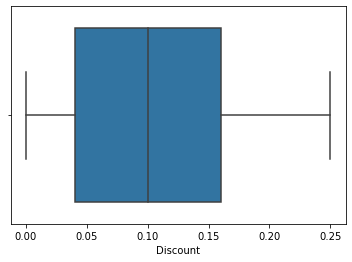

In [12]:
sns.boxplot(Train_set["Discount"])
plt.show()

In [13]:
Train_set["Discount"] = Train_set["Discount"].fillna(Train_set["Discount"].mean())
Test_set["Discount"] = Test_set["Discount"].fillna(Test_set["Discount"].mean())

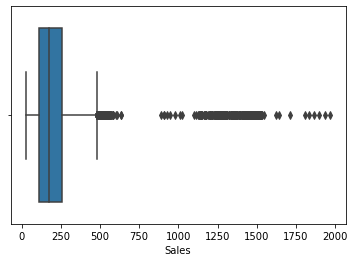

In [14]:
sns.boxplot(Train_set["Sales"])
plt.show()

In [15]:
Train_set["Sales"] = Train_set["Sales"].fillna(Train_set["Sales"].median())
Test_set["Sales"] = Test_set["Sales"].fillna(Test_set["Sales"].median())

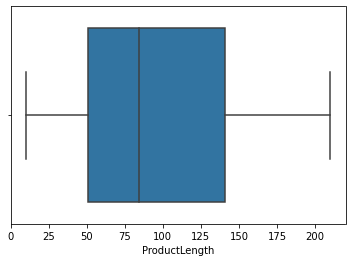

In [16]:
sns.boxplot(Train_set["ProductLength"])
plt.show()

In [17]:
Train_set["ProductLength"] = Train_set["ProductLength"].fillna(Train_set["ProductLength"].mean())
Test_set["ProductLength"] = Test_set["ProductLength"].fillna(Test_set["ProductLength"].mean())

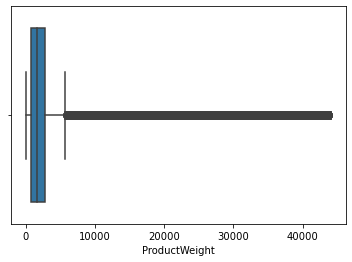

In [18]:
sns.boxplot(Train_set["ProductWeight"])
plt.show()

In [19]:
Train_set["ProductWeight"] = Train_set["ProductWeight"].fillna(Train_set["ProductWeight"].median())
Test_set["ProductWeight"] = Test_set["ProductWeight"].fillna(Test_set["ProductWeight"].median())

In [20]:
Total = Train_set.isnull().sum()
Percentage = (Train_set.isnull().sum()/Train_set.shape[0])*100

Missing_values = pd.DataFrame({'Total' : Total, "Percentage": Percentage}).sort_values(by = 'Total', ascending=False)
Missing_values.head(8)

,Total,Percentage
OrderId,0,0.0
Customer_Id,0,0.0
WeekdayOrder,0,0.0
Session_Ordered,0,0.0
Delivery_Review,0,0.0
Warehouse_Region,0,0.0
Scheduled_Shipping,0,0.0
Shipping_Class,0,0.0


### Heat Map

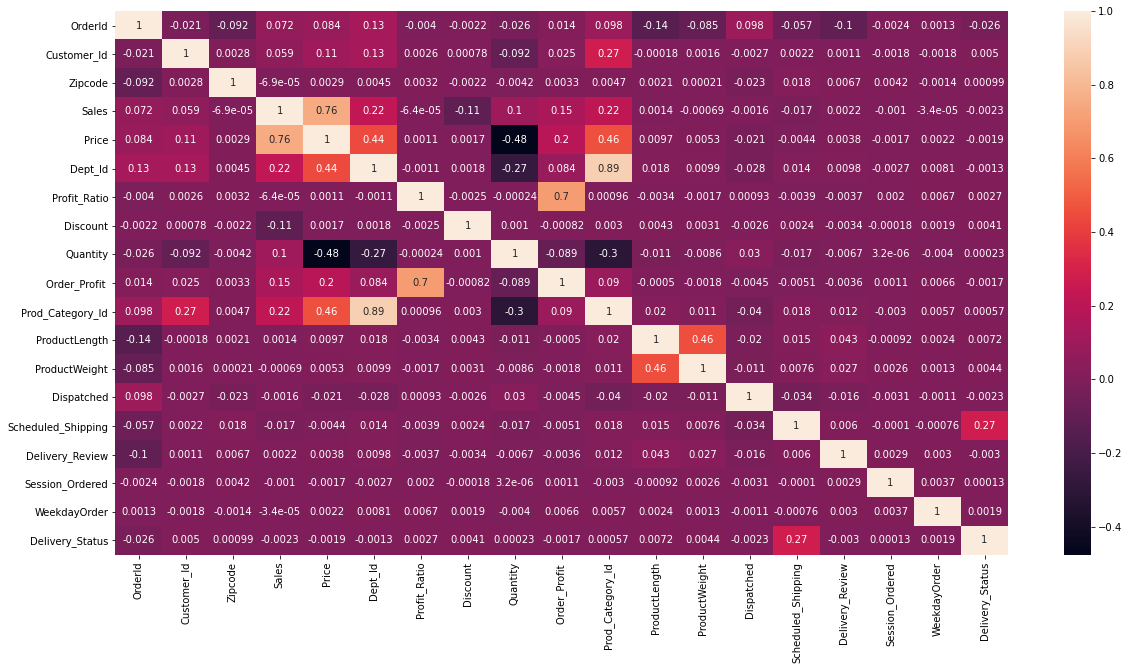

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(Train_set.corr(), annot = True)
plt.show()

#### No Missing Values in the Dataset

### Dropping unnecessary Columns

In [22]:
Train_set["OrderId"].nunique()

126363

In [23]:
Train_set = Train_set.drop(["OrderId"], axis = 1)
Test_set_Ids = Test_set['OrderId']
Test_set.drop('OrderId',axis = 1,inplace = True)

In [24]:
Train_set.head(2)

,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,12386,Consumer,AR,19120,150.0,Central,4383.39,Cat-2,UPI,4,Apparel,0.08,0.10,3,352.78,Fragile,17,191.0,1592.0,0,Standard,4,NORTH,5.0,2.0,0,0
1,2630,Consumer,BR,2907,165.0,East,4295.72,Cat-2,UPI,4,Apparel,0.47,0.16,3,2018.10,Fragile,17,79.0,1420.0,0,Standard,6,NORTH,2.0,2.0,1,0


### Checking Outliers

In [25]:
Num_var = Train_set.select_dtypes(include= np.number)
Num_var.drop(['Delivery_Status'], axis=1, inplace=True)
Num_var.head(2)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
0,12386,19120,150.0,4383.39,4,0.08,0.10,3,352.78,17,191.0,1592.0,0,4,5.0,2.0,0
1,2630,2907,165.0,4295.72,4,0.47,0.16,3,2018.10,17,79.0,1420.0,0,6,2.0,2.0,1


Customer_Id


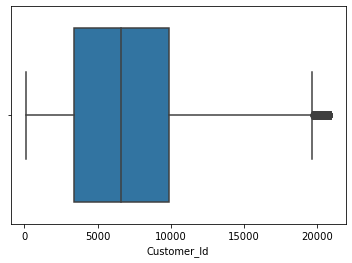

Zipcode


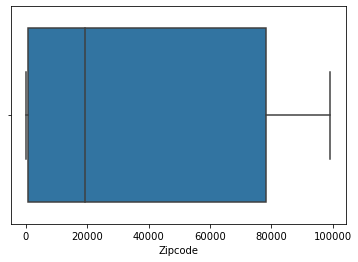

Sales


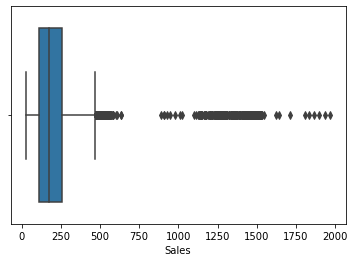

Price


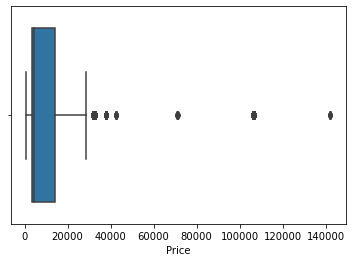

Dept_Id


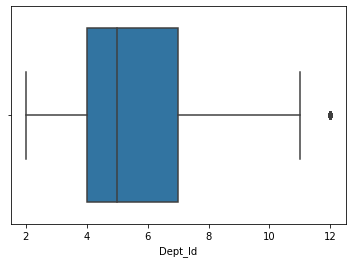

Profit_Ratio


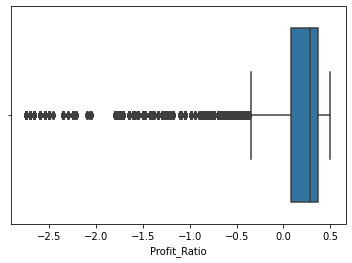

Discount


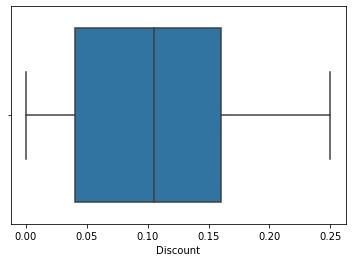

Quantity


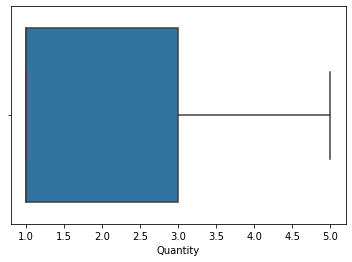

Order_Profit 


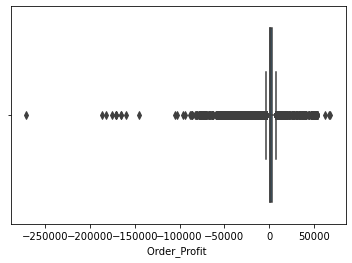

Prod_Category_Id


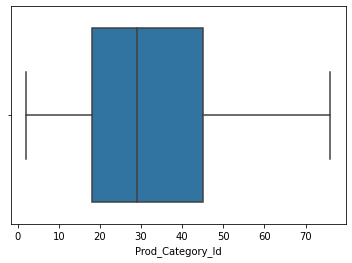

ProductLength


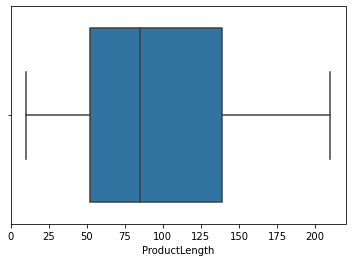

ProductWeight


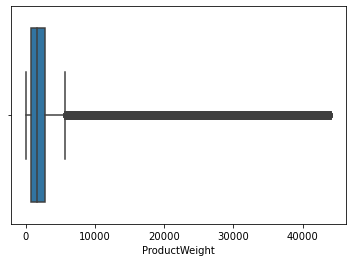

Dispatched


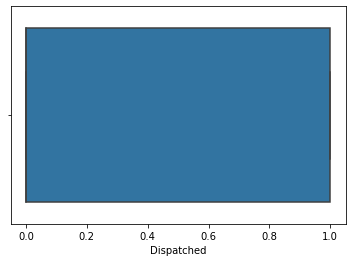

Scheduled_Shipping


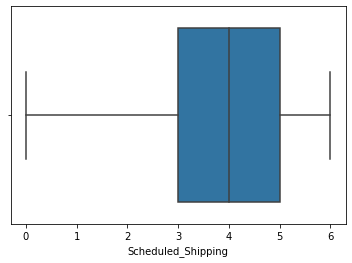

Delivery_Review


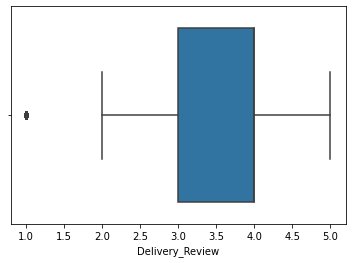

Session_Ordered


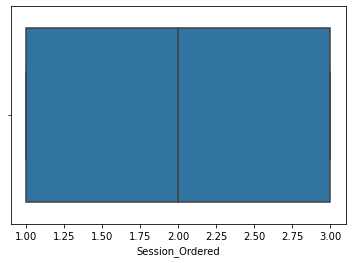

WeekdayOrder


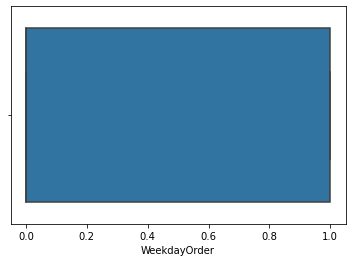

In [26]:
for i in Num_var:
    print(i)
    sns.boxplot(Num_var[i])
    plt.show()

### Scaling the Data

### Train

In [27]:
df_target = Train_set['Delivery_Status']

In [28]:
scaler = StandardScaler()
x = Num_var
Num_var_scaled = scaler.fit_transform(Num_var)

df_num_scaled = pd.DataFrame(Num_var_scaled, columns = x.columns)
df_num_scaled.head(2)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
0,1.339255,-0.448498,-0.379579,-0.572502,-0.886855,-0.094692,-0.076898,0.598466,-0.135147,-0.949593,1.736767,-0.282095,-0.806769,0.182170,1.749095,-0.001802,-0.995854
1,-1.003360,-0.880270,-0.254329,-0.581337,-0.886855,0.739455,0.769742,0.598466,0.113751,-0.949593,-0.310277,-0.304725,-0.806769,1.517719,-1.550003,-0.001802,1.004163


### Test

In [29]:
Num_var_test = Test_set.select_dtypes(include=np.number)
Num_var_test.head(1)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
0,2989,735,173.0,2833.08,5,-0.68,0.07,5,-1920.91,29,25.0,1720.0,0,6,5.0,2.0,1


In [30]:
scaler = StandardScaler()
Num_var_scaled = scaler.fit_transform(Num_var_test)
df_num_scaled_test = pd.DataFrame(Num_var_scaled, columns = x.columns)
df_num_scaled_test.head(1)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
0,-0.912621,-0.936478,-0.181501,-0.72786,-0.271337,-1.689855,-0.501509,1.98368,-0.42934,-0.180914,-1.294907,-0.267796,-0.804818,1.523889,1.748604,0.050977,0.997455


### Encoing Categorical Variable

### Train

In [31]:
Cat_var = Train_set.select_dtypes(include = "object")
Cat_var.head(2)

,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region
0,Consumer,AR,Central,Cat-2,UPI,Apparel,Fragile,Standard,NORTH
1,Consumer,BR,East,Cat-2,UPI,Apparel,Fragile,Standard,NORTH


In [101]:
# for i in Cat_var:
#     print(i)
#     print(Cat_var[i].unique())
#     print("\n")

In [32]:
def Encoding(x):
    if x.dtype == 'object':
        x= LabelEncoder().fit_transform(x)
    return x

In [33]:
Cat_var_coded = Cat_var.apply(lambda x: Encoding(x))
Cat_var_coded.head(2)

,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region
0,0,1,0,11,3,0,0,3,2
1,0,2,1,11,3,0,0,3,2


### Test

In [34]:
Cat_var_test = Test_set.select_dtypes(include = "object")
Cat_var_test.head(2)

,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region
0,others,HR,West,Cat-3,UPI,Golf,Fragile,Standard,NORTH
1,Consumer,MA,Central,Cat-49,Debit,Fan Shop,Fragile,Standard,CENTRAL


In [35]:
Cat_var_test_encoded = Cat_var_test.apply(lambda x: Encoding(x))
Cat_var_test_encoded.head(2)

,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region
0,2,5,4,22,3,6,0,3,2
1,0,9,0,43,2,3,0,3,0


### Merging Numberic and Categorical Columns

In [36]:
Train_set = pd.concat([df_num_scaled, Cat_var_coded, df_target], axis = 1)
Train_set.head(1)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region,Delivery_Status
0,1.339255,-0.448498,-0.379579,-0.572502,-0.886855,-0.094692,-0.076898,0.598466,-0.135147,-0.949593,1.736767,-0.282095,-0.806769,0.18217,1.749095,-0.001802,-0.995854,0,1,0,11,3,0,0,3,2,0


In [37]:
Test_set = pd.concat([df_num_scaled_test, Cat_var_test_encoded], axis = 1)
Test_set.head(1)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region
0,-0.912621,-0.936478,-0.181501,-0.72786,-0.271337,-1.689855,-0.501509,1.98368,-0.42934,-0.180914,-1.294907,-0.267796,-0.804818,1.523889,1.748604,0.050977,0.997455,2,5,4,22,3,6,0,3,2


### Statistical Testing

In [41]:
from scipy import stats

In [44]:
Train_set_copy = Train_set.copy()
Train_set_copy.head(1)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region,Delivery_Status
0,1.339255,-0.448498,-0.379579,-0.572502,-0.886855,-0.094692,-0.076898,0.598466,-0.135147,-0.949593,1.736767,-0.282095,-0.806769,0.18217,1.749095,-0.001802,-0.995854,0,1,0,11,3,0,0,3,2,0


In [82]:
Num_var.columns

Index(['Customer_Id', 'Zipcode', 'Sales', 'Price', 'Dept_Id', 'Profit_Ratio',
       'Discount', 'Quantity', 'Order_Profit ', 'Prod_Category_Id',
       'ProductLength', 'ProductWeight', 'Dispatched', 'Scheduled_Shipping',
       'Delivery_Review', 'Session_Ordered', 'WeekdayOrder'],
      dtype='object')

#### For Numerical Columns

In [89]:
X_new = X.drop(["Customer_Id","Zipcode",'Sales', 'Price', 'Dept_Id', 'Profit_Ratio','Discount', 'Quantity', 'Order_Profit ', 'Prod_Category_Id', 'ProductWeight', 'Dispatched',
       'Delivery_Review', 'Session_Ordered', 'WeekdayOrder',"Customer_Category", "Cust_State", "Order_zone", "CategoryName","Dept_Name","Warehouse_Region"], axis=1)

In [50]:
x1 = []
x2 = []

for i in df_num_scaled: #       
    fstat,pvalue = stats.f_oneway(Train_set_copy[Train_set_copy['Delivery_Status'] == 0][i],Train_set_copy[Train_set_copy['Delivery_Status'] == 1][i])
    x1.append(i)
    x2.append(np.format_float_positional(pvalue))
stat_test = pd.DataFrame(x2,index=x1,columns=['Pvalue'])
stat_test['Significant'] = stat_test['Pvalue'].apply(lambda x: 'Yes' if float(x) < 0.05 else 'No') 
stat_test

,Pvalue,Significant
Customer_Id,0.07685031717468363,No
Zipcode,0.7245368047223054,No
Sales,0.40395234532875834,No
Price,0.49829304803455166,No
Dept_Id,0.64791867834765,No
Profit_Ratio,0.3305423414206031,No
Discount,0.14118314285315603,No
Quantity,0.9334829817384092,No
Order_Profit,0.5500727284836492,No
Prod_Category_Id,0.8381554160101528,No


#### For Categorical Columns

In [63]:
Train_set.head(2)

,Customer_Id,Zipcode,Sales,Price,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Product_type,Shipping_Class,Warehouse_Region,Delivery_Status
0,1.339255,-0.448498,-0.379579,-0.572502,-0.886855,-0.094692,-0.076898,0.598466,-0.135147,-0.949593,1.736767,-0.282095,-0.806769,0.182170,1.749095,-0.001802,-0.995854,0,1,0,11,3,0,0,3,2,0
1,-1.003360,-0.880270,-0.254329,-0.581337,-0.886855,0.739455,0.769742,0.598466,0.113751,-0.949593,-0.310277,-0.304725,-0.806769,1.517719,-1.550003,-0.001802,1.004163,0,2,1,11,3,0,0,3,2,0


In [53]:
x3 = []
x4 = []

for i in(Cat_var_coded.columns):
    teststats,pvalue,dof,exp_freq = stats.chi2_contingency(pd.crosstab(Train_set[i],Train_set['Delivery_Status']))
    x3.append(i)
    x4.append(np.format_float_positional(pvalue))
stat_test_1 = pd.DataFrame(x4,index=x3,columns=['Pvalue'])
stat_test_1['Significant'] = stat_test_1['Pvalue'].apply(lambda x: 'Yes' if float(x) < 0.05 else 'No') 
stat_test_1

,Pvalue,Significant
Customer_Category,0.8136180863755129,No
Cust_State,0.36592787189349185,No
Order_zone,0.6765708660112342,No
CategoryName,0.6594589219621426,No
Transcation,0.00000000000000000000000000000000000000000000...,Yes
Dept_Name,0.2586274331356891,No
Product_type,0.0003428487324549881,Yes
Shipping_Class,0.,Yes
Warehouse_Region,0.9843889319770143,No


### Splitting Train Data into Train set and Validation set i.e. Test set

In [75]:
X = Train_set.drop(['Delivery_Status'], axis = 1)
y = Train_set['Delivery_Status']

## Model Building 

### Model 1 - LogisticRegression

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.6962112968641805
Testing Accuracy 0.6948917817433625


Train ROC AUC score: 0.6119972079534175
Test ROC AUC score: 0.6121977696333771


Train Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79     67952
           1       0.56      0.37      0.44     33138

    accuracy                           0.70    101090
   macro avg       0.65      0.61      0.62    101090
weighted avg       0.68      0.70      0.68    101090

Test Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79     16960
           1       0.55      0.37      0.44      8313

    accuracy                           0.69     25273
   macro avg       0.64      0.61      0.62     25273
weighted avg       0.68      0.69      0.68     25273



### Model 2 - DecisionTreeClassifier

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 1.0
Testing Accuracy 0.715704506785898


Train ROC AUC score: 1.0
Test ROC AUC score: 0.6764325248417459


Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     67952
           1       1.00      1.00      1.00     33138

    accuracy                           1.00    101090
   macro avg       1.00      1.00      1.00    101090
weighted avg       1.00      1.00      1.00    101090

Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     16960
           1       0.57      0.56      0.57      8313

    accuracy                           0.72     25273
   macro avg       0.68      0.68      0.68     25273
weighted avg       0.71      0.72      0.72     25273



In [50]:
# X_new = X.drop(['Dept_Id', 'Product_type'], axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.7624987634780889
Testing Accuracy 0.7413445178649152


Train ROC AUC score: 0.7684457936694808
Test ROC AUC score: 0.7434973375129655


Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81     67952
           1       0.61      0.79      0.68     33138

    accuracy                           0.76    101090
   macro avg       0.74      0.77      0.75    101090
weighted avg       0.79      0.76      0.77    101090

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79     16960
           1       0.58      0.75      0.66      8313

    accuracy                           0.74     25273
   macro avg       0.72      0.74      0.72     25273
weighted avg       0.77      0.74      0.75     25273



### BEST 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size = 0.2,random_state = 1)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 50,
                                  min_samples_split = 10,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# {'criterion': ['entropy', 'gini'], 
# #                      'max_depth': range(2, 10),
# #                      'max_features': ["sqrt", "log2"],
# #                      'min_samples_split': range(2,10),
# #                      'min_samples_leaf': range(1,10),
# #                      'max_leaf_nodes': range(1, 10)}

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.7403402908299535
Testing Accuracy 0.7352906263601472


Train ROC AUC score: 0.7608456660634568
Test ROC AUC score: 0.7542582060605235


Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78     67952
           1       0.57      0.82      0.67     33138

    accuracy                           0.74    101090
   macro avg       0.73      0.76      0.73    101090
weighted avg       0.79      0.74      0.75    101090

Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78     16960
           1       0.57      0.81      0.67      8313

    accuracy                           0.74     25273
   macro avg       0.73      0.75      0.72     25273
weighted avg       0.78      0.74      0.74     25273



#### TUNING 

In [ ]:
# tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                      'max_depth': range(2, 10),
#                      'max_features': ["sqrt", "log2"],
#                      'min_samples_split': range(2,10),
#                      'min_samples_leaf': range(1,10),
#                      'max_leaf_nodes': range(1, 10)}]
 
# model = DecisionTreeClassifier(random_state = 10)

# tree_grid = GridSearchCV(estimator = model, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5)

# tree_grid_model = tree_grid.fit(X_train, y_train)

# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [ ]:
# model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
#                                   max_depth = tree_grid_model.best_params_.get('max_depth'),
#                                   max_features = tree_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)

# model = model.fit(X_train, y_train)

### Model 3 - RandonForestClassifier

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10,random_state = 10)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.9925808685329904
Testing Accuracy 0.7084240098128437


Train ROC AUC score: 0.9900519464890726
Test ROC AUC score: 0.6523326302971704


Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     67952
           1       0.99      0.98      0.99     33138

    accuracy                           0.99    101090
   macro avg       0.99      0.99      0.99    101090
weighted avg       0.99      0.99      0.99    101090

Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79     16960
           1       0.57      0.49      0.52      8313

    accuracy                           0.71     25273
   macro avg       0.67      0.65      0.66     25273
weighted avg       0.70      0.71      0.70     25273



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=10,random_state=0)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.7720546048075972
Testing Accuracy 0.7318086495469474


Train ROC AUC score: 0.7499201338799925
Test ROC AUC score: 0.7014335710265122


Train Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83     67952
           1       0.64      0.69      0.66     33138

    accuracy                           0.77    101090
   macro avg       0.74      0.75      0.75    101090
weighted avg       0.78      0.77      0.77    101090

Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80     16960
           1       0.59      0.61      0.60      8313

    accuracy                           0.73     25273
   macro avg       0.70      0.70      0.70     25273
weighted avg       0.73      0.73      0.73     25273



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=10,random_state=0)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

### KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.ensemble import RandomForestClassifier
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

### Tuned RF Model

In [54]:
Test_set = Test_set.drop(['Dept_Id', 'Product_type'], axis=1)
Test_set.head(1)

,Customer_Id,Zipcode,Sales,Price,Profit_Ratio,Discount,Quantity,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Customer_Category,Cust_State,Order_zone,CategoryName,Transcation,Dept_Name,Shipping_Class,Warehouse_Region
0,-0.912621,-0.936478,-0.181501,-0.72786,-1.689855,-0.501509,1.98368,-0.42934,-0.180914,-1.294907,-0.267796,-0.804818,1.523889,1.748604,0.050977,0.997455,2,5,4,22,3,6,3,2


In [91]:
Test_new = Test_set.drop(["Customer_Id","Zipcode",'Sales', 'Price', 'Dept_Id', 'Profit_Ratio','Discount', 'Quantity', 'Order_Profit ', 'Prod_Category_Id', 'ProductWeight', 'Dispatched',
       'Delivery_Review', 'Session_Ordered', 'WeekdayOrder',"Customer_Category", "Cust_State", "Order_zone", "CategoryName","Dept_Name","Warehouse_Region"], axis=1)

### Predicting on test data using Random Forest model 

In [94]:
Final_Prediction = model.predict(Test_new)
submission=pd.DataFrame([Test_set_Ids,Final_Prediction]).T
submission.rename(columns={"Unnamed 0": "Delivery_Status"},inplace=True)
submission.to_csv('submission.csv',index = False)

In [95]:
submission.head()

,OrderId,Delivery_Status
0,2372881,1
1,2445349,0
2,2441537,1
3,2461867,1
4,2461659,0
